<a href="https://colab.research.google.com/github/giolml/Deteccion_Enfermedades_pulmonares/blob/main/Departamento_de_Operaciones(Detecci%C3%B3n_de_Enfermedades_Pulmonares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Especificar el directorio del conjunto de entrenamiento
XRay_Directory = "/content/drive/MyDrive/Colab Notebooks/4. Operations Department/Dataset"

In [8]:
# Listar las carpetas de dicho directorio
os.listdir(XRay_Directory)

['1', '0', '2', '3']

In [9]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [10]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = XRay_Directory, shuffle = True,
                                                      target_size = (256, 256), class_mode = "categorical", subset = 'training')

Found 428 images belonging to 4 classes.


In [11]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = XRay_Directory, shuffle = True,
                                                      target_size = (256, 256), class_mode = "categorical", subset = 'validation')

Found 104 images belonging to 4 classes.


In [12]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [13]:
train_images.shape

(40, 256, 256, 3)

In [14]:
train_labels.shape

(40, 4)

In [15]:
train_labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]],

In [16]:
# Traductor de cada Etiqueta
label_names = {0: 'COVID-19', 1: 'Normal', 2: 'Pneumonia Virica', 3: 'Pneumonia Bacteriana'}

# TAREA #3: VISUALIZACIÓN DEL DATASET

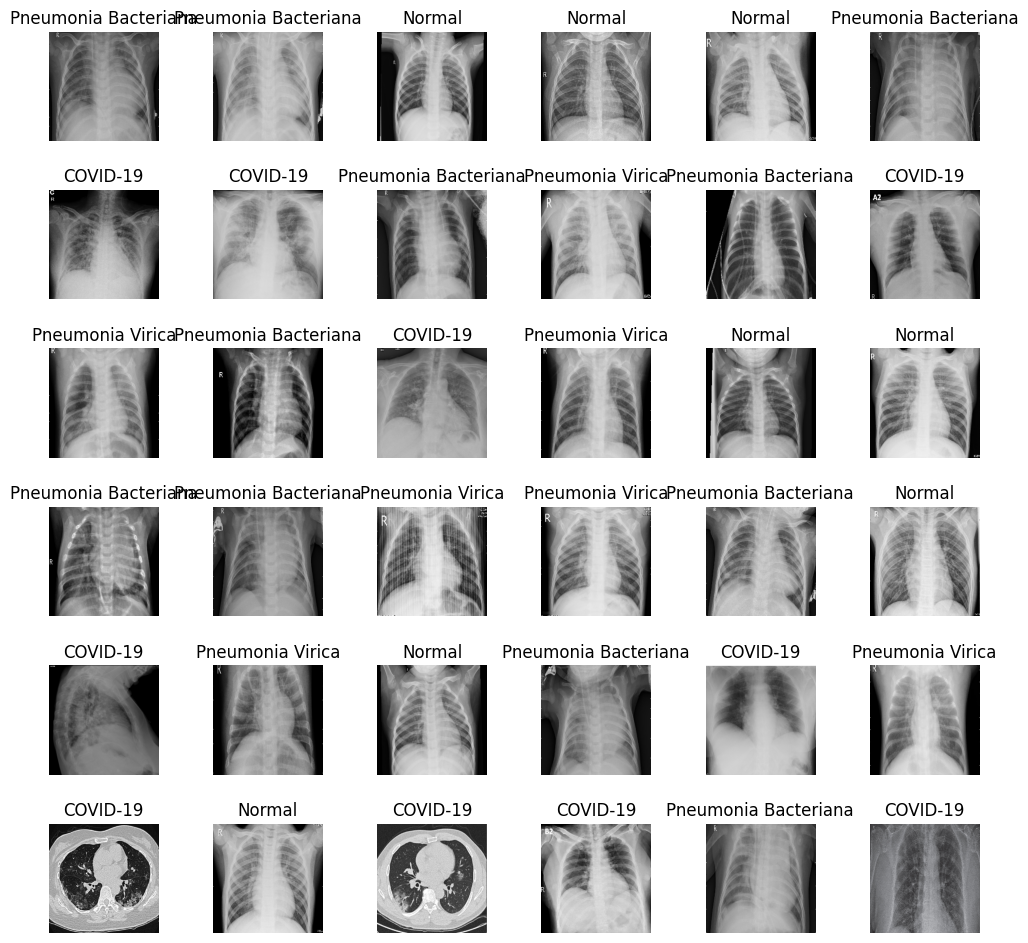

In [17]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(train_images[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [18]:
basemodel = ResNet50(weights = "imagenet", include_top = False, input_tensor = Input(shape = (256,256,3)))

94765736/94765736 [==============================] - 1s 0us/step


In [19]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [20]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5
for layer in basemodel.layers[:-10]:
  layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [21]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.1)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ["accuracy"])

In [23]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only=True)

In [24]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory = XRay_Directory, shuffle = True, target_size=(256,256), class_mode = 'categorical', subset = 'training')
val_generator = image_generator.flow_from_directory(batch_size = 4, directory = XRay_Directory, shuffle = True, target_size=(256,256), class_mode = 'categorical', subset = 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [25]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.n//4, epochs = 25,
                              validation_data = val_generator, validation_steps = val_generator.n // 4,
                              callbacks = [checkpointer, earlystopping])


<ipython-input-25-bb26cc4ce111>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.n//4, epochs = 25,


Epoch 1/25
107/107 [==============================] - ETA: 0s - loss: 1.3359 - accuracy: 0.3879
Epoch 1: val_loss improved from inf to 1.28156, saving model to weights.hdf5
107/107 [==============================] - 111s 1s/step - loss: 1.3359 - accuracy: 0.3879 - val_loss: 1.2816 - val_accuracy: 0.4712
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.9494 - accuracy: 0.6028
Epoch 2: val_loss did not improve from 1.28156
107/107 [==============================] - 100s 938ms/step - loss: 0.9494 - accuracy: 0.6028 - val_loss: 1.3419 - val_accuracy: 0.4615
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.6519
Epoch 3: val_loss improved from 1.28156 to 1.23627, saving model to weights.hdf5
107/107 [==============================] - 101s 951ms/step - loss: 0.8446 - accuracy: 0.6519 - val_loss: 1.2363 - val_accuracy: 0.4712
Epoch 4/25
107/107 [==============================] - ETA: 0s - loss: 0.7437 - accuracy: 0.7033
Epoch 4: 

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

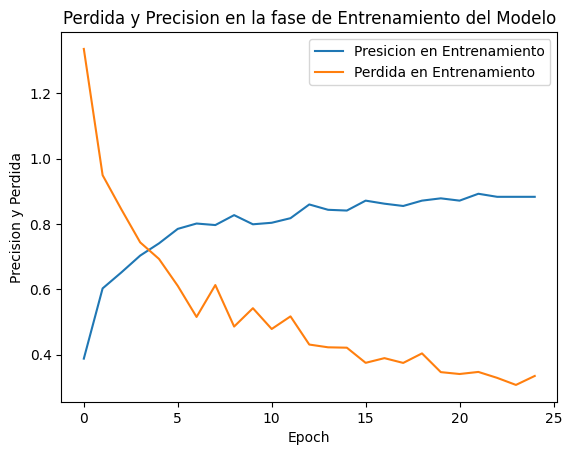

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title("Perdida y Precision en la fase de Entrenamiento del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Precision y Perdida")
plt.legend(["Presicion en Entrenamiento", "Perdida en Entrenamiento"])

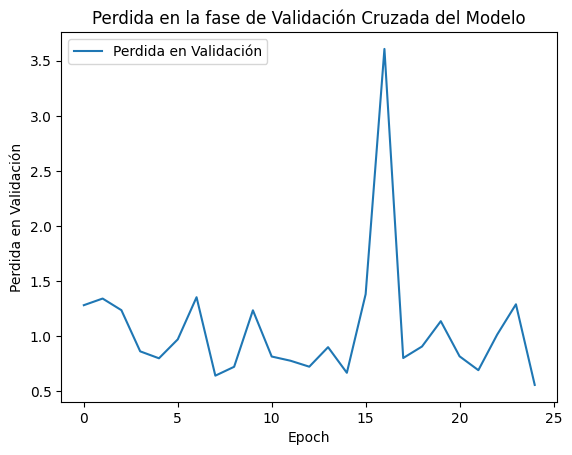

In [28]:
plt.plot(history.history['val_loss'])

plt.title("Perdida en la fase de Validación Cruzada del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Perdida en Validación")
plt.legend(["Perdida en Validación"])

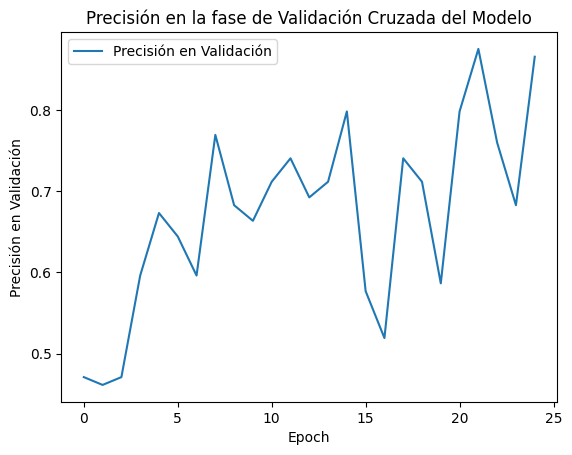

In [29]:
plt.plot(history.history['val_accuracy'])

plt.title("Precisión en la fase de Validación Cruzada del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Precisión en Validación")
plt.legend(["Precisión en Validación"])

In [30]:
test_directory = "/content/drive/MyDrive/Colab Notebooks/4. Operations Department/Test"

In [31]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory = test_directory, shuffle = True, target_size = (256,256), class_mode = "categorical")

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)

print("Precisión en la fase de test : {}".format(evaluate[1]))

Found 40 images belonging to 4 classes.


<ipython-input-31-d7b359ef74b9>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)


 1/10 [==>...........................] - ETA: 1:10 - loss: 1.3082 - accuracy: 0.7000

10/10 [==============================] - 8s 35ms/step - loss: 1.3082 - accuracy: 0.7000
Precisión en la fase de test : 0.699999988079071


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory, str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256,256))
        image.append(img)
        img = img/255
        img = img.reshape(-1, 256, 256, 3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

1/1 [==============================] - 0s 244ms/step


In [33]:
len(original)

40

In [34]:
score = accuracy_score(original, prediction)
print("Eficacia de la prediccion: {}".format(score))

Eficacia de la prediccion: 0.7


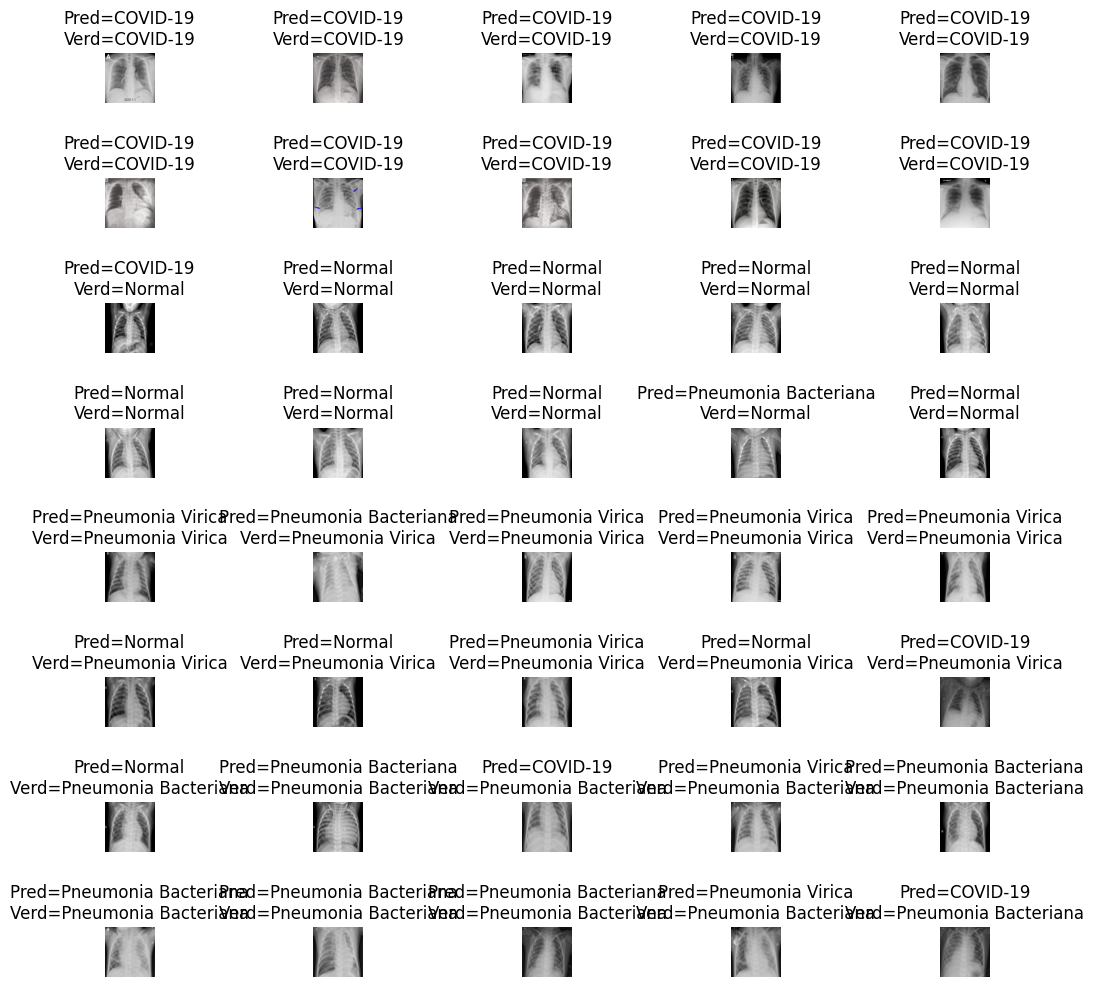

In [35]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(image[i])
  axes[i].set_title("Pred={}\nVerd={}".format(str(label_names[prediction[i]]), str(label_names[original[i]])))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2, hspace = 1.5)

In [36]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.67      0.80      0.73        10
           2       0.71      0.50      0.59        10
           3       0.71      0.50      0.59        10

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.68        40
weighted avg       0.70      0.70      0.68        40



Text(0.5, 1.0, 'Matrix de Confusion')

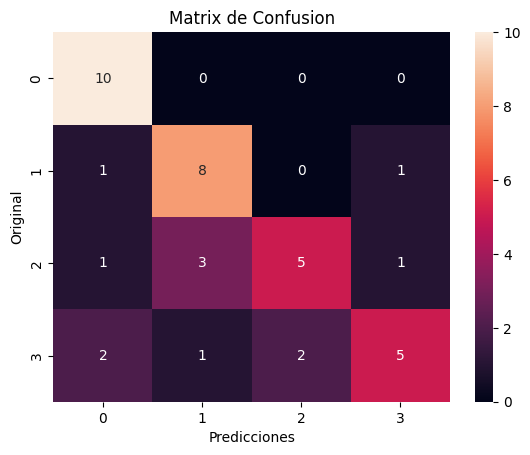

In [38]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicciones")
ax.set_ylabel("Original")
ax.set_title("Matrix de Confusion")